## Initialization 

In [36]:
import pandas as pd

ds_movie = pd.read_csv("movie.csv")
ds_rating = pd.read_csv("rating.csv")

In [37]:
ds_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [38]:
ds_rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [39]:
df = pd.merge(ds_rating, ds_movie, on='movieId', how='inner')
df = df.sort_values(by=['movieId'])

In [40]:
df.head()

,userId,movieId,rating,timestamp,title,genres
14162882,97809,1,3.0,2008-06-11 04:47:11,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
15347420,106140,1,5.0,2013-01-29 03:33:49,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
15347355,106138,1,3.0,2002-07-31 15:48:53,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
10170195,70354,1,4.5,2011-02-13 18:55:40,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
10170255,70355,1,3.5,2008-01-26 16:56:54,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [41]:
interactions_count = ds_rating.groupby('userId').size().reset_index(name='num_interactions')
interactions_count

,userId,num_interactions
0,1,175
1,2,61
2,3,187
3,4,28
4,5,66
...,...,...
138488,138489,38
138489,138490,151
138490,138491,22
138491,138492,82


## EDA
- Sort movies with 10000+ ratings

In [42]:
import scipy.stats
import seaborn as sb

agr_ratings = df.groupby('title').agg(mean_rating = ('rating','mean'), number_of_ratings = ('rating', 'count')).reset_index()

agr_ratings_100 = agr_ratings[agr_ratings['number_of_ratings'] > 10000]
agr_ratings_100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 38 to 26534
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              462 non-null    object 
 1   mean_rating        462 non-null    float64
 2   number_of_ratings  462 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 14.4+ KB


In [43]:
agr_ratings_100.sort_values(by='number_of_ratings', ascending=False).head()

,title,mean_rating,number_of_ratings
18824,Pulp Fiction (1994),4.174231,67310
8716,Forrest Gump (1994),4.029000,66172
20779,"Shawshank Redemption, The (1994)",4.446990,63366
20994,"Silence of the Lambs, The (1991)",4.177057,63299
12645,Jurassic Park (1993),3.664741,59715


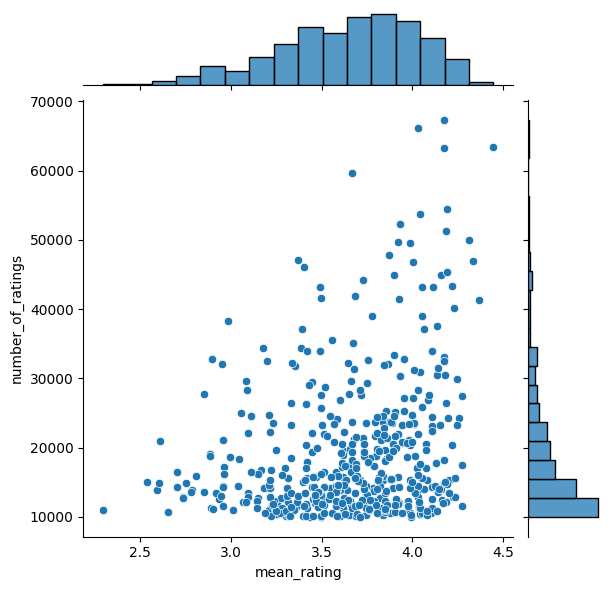

In [44]:
sb.jointplot(x='mean_rating', y='number_of_ratings', data=agr_ratings_100)

In [45]:
df_100 = pd.merge(df, agr_ratings_100[['title']], on='title', how='inner')
df_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9050403 entries, 0 to 9050402
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 414.3+ MB


## Processing

In [46]:
## Select the userId here
selectUser = 50 ## change this to any
temp = interactions_count[interactions_count['userId'] == selectUser]
ground_truth = temp.iloc[0]['num_interactions']
print(ground_truth)

99


In [47]:
matrix_temp = df_100.pivot_table(index='userId', columns='title', values='rating')
matrix = matrix_temp.iloc[:3000]
matrix

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),...,Wild Wild West (1999),William Shakespeare's Romeo + Juliet (1996),Willy Wonka & the Chocolate Factory (1971),Witness (1985),"Wizard of Oz, The (1939)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,4.0,NaN,4.0
2,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,5.0,4.0,4.0,5.0,NaN,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3018,4.5,NaN,NaN,2.5,4.0,NaN,NaN,2.5,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3019,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN


In [48]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),...,Wild Wild West (1999),William Shakespeare's Romeo + Juliet (1996),Willy Wonka & the Chocolate Factory (1971),Witness (1985),"Wizard of Oz, The (1939)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-0.316092,-0.316092,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.316092,NaN,NaN,0.183908,NaN,0.183908
2,NaN,NaN,0.576923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.653465,NaN,NaN,NaN,-1.346535,NaN,NaN,NaN,...,NaN,NaN,0.653465,-0.346535,-0.346535,0.653465,NaN,NaN,NaN,0.653465
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.608696,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-2.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,NaN,NaN,NaN,NaN,NaN,-1.15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.150000,NaN,NaN,NaN
3018,0.674528,NaN,NaN,-1.325472,0.174528,NaN,NaN,-1.325472,-1.825472,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3019,-0.066667,0.933333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.066667,NaN


In [49]:
user_similarity = matrix_norm.T.corr()
user_similarity

userId,1,2,3,4,5,6,7,8,9,10,...,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.078811,0.231359,NaN,4.676771e-01,NaN,0.169138,0.000000,0.000000,0.526787,...,NaN,-3.952847e-01,-0.426746,0.393444,-0.324176,-0.056403,0.099003,NaN,0.277966,7.881104e-02
2,-0.078811,1.000000,0.031265,NaN,6.454972e-01,0.866025,0.542897,-0.408248,NaN,NaN,...,NaN,NaN,0.912871,NaN,-0.693375,-0.127000,-0.517306,NaN,-0.139629,NaN
3,0.231359,0.031265,1.000000,0.243975,-1.842075e-01,-0.275839,0.020174,0.132617,0.500000,0.096339,...,NaN,-6.328776e-02,0.703147,-0.533114,-0.100901,-0.040423,0.097694,NaN,-0.073665,-1.622214e-01
4,NaN,NaN,0.243975,1.000000,2.631174e-01,NaN,0.133631,0.585293,NaN,NaN,...,NaN,-5.854906e-01,NaN,NaN,1.000000,0.418330,-0.188982,NaN,0.296484,NaN
5,0.467677,0.645497,-0.184208,0.263117,1.000000e+00,0.185826,0.464860,-0.080766,NaN,NaN,...,NaN,-4.016097e-01,0.392972,0.142862,0.244966,-0.114708,-0.110432,NaN,0.179168,5.551115e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,-0.056403,-0.127000,-0.040423,0.418330,-1.147079e-01,0.500000,0.338376,0.831513,NaN,-0.353553,...,NaN,-4.708816e-02,0.213395,0.058329,NaN,1.000000,0.007316,NaN,0.319801,NaN
3018,0.099003,-0.517306,0.097694,-0.188982,-1.104315e-01,NaN,0.372132,0.815987,0.922531,0.275054,...,NaN,5.224089e-01,0.262737,-0.323491,0.310530,0.007316,1.000000,-0.688247,-0.212615,1.961161e-01
3019,NaN,NaN,NaN,NaN,NaN,NaN,-0.612372,-0.755929,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,-0.688247,1.000000,0.354159,NaN


In [50]:
user_similarity.drop(index=selectUser, inplace=True)
user_similarity

userId,1,2,3,4,5,6,7,8,9,10,...,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.078811,0.231359,NaN,4.676771e-01,NaN,0.169138,0.000000,0.000000,0.526787,...,NaN,-3.952847e-01,-0.426746,0.393444,-0.324176,-0.056403,0.099003,NaN,0.277966,7.881104e-02
2,-0.078811,1.000000,0.031265,NaN,6.454972e-01,0.866025,0.542897,-0.408248,NaN,NaN,...,NaN,NaN,0.912871,NaN,-0.693375,-0.127000,-0.517306,NaN,-0.139629,NaN
3,0.231359,0.031265,1.000000,0.243975,-1.842075e-01,-0.275839,0.020174,0.132617,0.500000,0.096339,...,NaN,-6.328776e-02,0.703147,-0.533114,-0.100901,-0.040423,0.097694,NaN,-0.073665,-1.622214e-01
4,NaN,NaN,0.243975,1.000000,2.631174e-01,NaN,0.133631,0.585293,NaN,NaN,...,NaN,-5.854906e-01,NaN,NaN,1.000000,0.418330,-0.188982,NaN,0.296484,NaN
5,0.467677,0.645497,-0.184208,0.263117,1.000000e+00,0.185826,0.464860,-0.080766,NaN,NaN,...,NaN,-4.016097e-01,0.392972,0.142862,0.244966,-0.114708,-0.110432,NaN,0.179168,5.551115e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,-0.056403,-0.127000,-0.040423,0.418330,-1.147079e-01,0.500000,0.338376,0.831513,NaN,-0.353553,...,NaN,-4.708816e-02,0.213395,0.058329,NaN,1.000000,0.007316,NaN,0.319801,NaN
3018,0.099003,-0.517306,0.097694,-0.188982,-1.104315e-01,NaN,0.372132,0.815987,0.922531,0.275054,...,NaN,5.224089e-01,0.262737,-0.323491,0.310530,0.007316,1.000000,-0.688247,-0.212615,1.961161e-01
3019,NaN,NaN,NaN,NaN,NaN,NaN,-0.612372,-0.755929,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,-0.688247,1.000000,0.354159,NaN


In [51]:
n = 10
threshold = 0.3
similar_users = user_similarity[user_similarity[selectUser]>threshold][selectUser].sort_values(ascending=False)[:n]
print(f'The similar users for {selectUser} are', similar_users)

The similar users for 50 are userId
4       1.0
2110    1.0
1773    1.0
302     1.0
1929    1.0
2079    1.0
2103    1.0
2106    1.0
2178    1.0
1710    1.0
Name: 50, dtype: float64


In [52]:
picked_userid_watched = matrix_norm[matrix_norm.index == selectUser].dropna(axis=1, how='all')
picked_userid_watched

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),Apocalypse Now (1979),Apollo 13 (1995),Back to the Future (1985),Beetlejuice (1988),Being John Malkovich (1999),Big Fish (2003),...,Shrek (2001),"Silence of the Lambs, The (1991)","Sixth Sense, The (1999)",Sleepless in Seattle (1993),Some Like It Hot (1959),Spirited Away (Sen to Chihiro no kamikakushi) (2001),Stand by Me (1986),Terminator 2: Judgment Day (1991),Titanic (1997),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
userId,,,,,,,,,,,,,,,,,,,,,
50,0.835714,-2.164286,0.835714,-0.164286,0.335714,-0.664286,0.835714,-0.164286,-0.164286,-0.164286,...,-0.164286,-0.164286,-0.164286,-0.164286,-0.664286,0.835714,0.835714,0.335714,-0.164286,-0.164286


In [53]:
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

title,"Abyss, The (1989)",Ace Ventura: When Nature Calls (1995),"Adventures of Priscilla, Queen of the Desert, The (1994)",Aladdin (1992),Almost Famous (2000),American Beauty (1999),Apollo 13 (1995),Arachnophobia (1990),Basic Instinct (1992),Batman (1989),...,Tomorrow Never Dies (1997),Total Recall (1990),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)",Wag the Dog (1997),Wallace & Gromit: The Wrong Trousers (1993),Witness (1985),X2: X-Men United (2003)
userId,,,,,,,,,,,,,,,,,,,,,
4,NaN,-0.608696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.608696,-2.608696,NaN,NaN,NaN,NaN,NaN
302,-0.111111,NaN,NaN,NaN,NaN,0.888889,NaN,-0.111111,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1773,NaN,NaN,NaN,0.222222,NaN,NaN,0.222222,NaN,NaN,-0.777778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.125,NaN,NaN,NaN,NaN
2103,NaN,NaN,0.833333,NaN,NaN,NaN,NaN,NaN,-1.666667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.333333,0.833333,NaN
2106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')
similar_user_movies

title,"Abyss, The (1989)",Ace Ventura: When Nature Calls (1995),"Adventures of Priscilla, Queen of the Desert, The (1994)",Aladdin (1992),Almost Famous (2000),Arachnophobia (1990),Basic Instinct (1992),Batman (1989),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),...,To Kill a Mockingbird (1962),Tomorrow Never Dies (1997),Total Recall (1990),Toy Story (1995),True Lies (1994),"Usual Suspects, The (1995)",Wag the Dog (1997),Wallace & Gromit: The Wrong Trousers (1993),Witness (1985),X2: X-Men United (2003)
userId,,,,,,,,,,,,,,,,,,,,,
4,NaN,-0.608696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.608696,NaN,NaN,NaN,NaN,NaN
302,-0.111111,NaN,NaN,NaN,NaN,-0.111111,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,...,NaN,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1773,NaN,NaN,NaN,0.222222,NaN,NaN,NaN,-0.777778,NaN,0.222222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.727273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.125,NaN,NaN,NaN,NaN
2103,NaN,NaN,0.833333,NaN,NaN,NaN,-1.666667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.333333,0.833333,NaN
2106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,...,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
item_score = {}

for i in similar_user_movies.columns:
  movie_rating = similar_user_movies[i]
  total = 0
  count = 0
  for u in similar_users.index:
    if pd.isna(movie_rating[u]) == False:
      score = similar_users[u] * movie_rating[u]
      total += score
      count +=1
  item_score[i] = total / count

item_score = pd.DataFrame(item_score.items(), columns=['title', 'movie_score'])
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

m = 10
ranked_item_score.head(m)

,title,movie_score
68,Rain Man (1988),2.000000
28,Dirty Dancing (1987),2.000000
26,Die Hard (1988),1.526316
35,"Firm, The (1993)",1.391304
71,"Rock, The (1996)",1.391304
8,"Beautiful Mind, A (2001)",1.333333
36,"Fugitive, The (1993)",1.222222
18,Clear and Present Danger (1994),1.222222
55,"Matrix Reloaded, The (2003)",1.026316
51,Jerry Maguire (1996),1.000000


## Evaluation Metrics

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

ranked_item_score = pd.merge(ranked_item_score, ds_movie[['title', 'genres']], on='title', how='left')

In [57]:
# ranked_item_score = ranked_item_score.drop(columns=['genres_x', 'genres_y'])
ranked_item_score.head()

,title,movie_score,genres
0,Rain Man (1988),2.000000,Drama
1,Dirty Dancing (1987),2.000000,Drama|Musical|Romance
2,Die Hard (1988),1.526316,Action|Crime|Thriller
3,"Firm, The (1993)",1.391304,Drama|Thriller
4,"Rock, The (1996)",1.391304,Action|Adventure|Thriller


In [58]:
user_interactions = pd.merge(ds_rating[ds_rating['userId'] == selectUser], ds_movie[['movieId', 'title', 'genres']], on='movieId', how='left')

In [59]:
user_interactions.head()

,userId,movieId,rating,timestamp,title,genres
0,50,32,4.0,2007-06-20 14:18:10,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
1,50,39,3.5,2007-06-20 14:20:03,Clueless (1995),Comedy|Romance
2,50,47,4.0,2007-06-20 14:05:47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
3,50,150,3.5,2007-06-20 14:17:44,Apollo 13 (1995),Adventure|Drama|IMAX
4,50,215,5.0,2007-06-20 13:57:36,Before Sunrise (1995),Drama|Romance


In [60]:
user_interactions.drop(columns=['timestamp'])

,userId,movieId,rating,title,genres
0,50,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
1,50,39,3.5,Clueless (1995),Comedy|Romance
2,50,47,4.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
3,50,150,3.5,Apollo 13 (1995),Adventure|Drama|IMAX
4,50,215,5.0,Before Sunrise (1995),Drama|Romance
...,...,...,...,...,...
94,50,36276,3.0,Hidden (a.k.a. Cache) (Caché) (2005),Drama|Mystery|Thriller
95,50,36529,5.0,Lord of War (2005),Action|Crime|Drama|Thriller|War
96,50,48043,3.5,"Fountain, The (2006)",Drama|Fantasy|Romance
97,50,48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller


In [61]:
def recall_at_k(ranked_item_score, ground_truth, k):
    top_k_items = ranked_item_score.head(k)['genres'].tolist()
    actual_items = user_interactions['genres'].tolist()  
    common_items = count
    print(common_items)
    print(len(actual_items))
    recall = common_items / len(actual_items)
    return recall

In [62]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

k = 50  # Number of top items to consider

top_n_rits = ranked_item_score.head(k)
top_n_ui = user_interactions.head(k)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_ranked = tfidf_vectorizer.fit_transform(top_n_rits['title'] + ' ' + top_n_rits['genres'])
tfidf_matrix_user = tfidf_vectorizer.transform(top_n_ui['title'] + ' ' + top_n_ui['genres'])

similarity_matrix = cosine_similarity(tfidf_matrix_user, tfidf_matrix_ranked)
similarity_df = pd.DataFrame(similarity_matrix, index=top_n_ui['title'], columns=top_n_rits['title'])
    
similar_movies = []

for i, user_movie in enumerate(top_n_ui['title']):
      for j, ranked_movie in enumerate(top_n_rits['title']):
        similarity = similarity_matrix[i, j]
        if similarity > 0.5:
            similar_movies.append((user_movie, ranked_movie))
                
for user_movie, ranked_movie in similar_movies:
    count += 1
    
recall = recall_at_k(ranked_item_score, temp, k)
print("recall@{}: {:.2f}".format(k, recall))

18
99
recall@50: 0.18


In [63]:
print("Movie Dimensions: ", ds_movie.shape)
print("Rating Dimensions: ", ds_rating.shape)

Movie Dimensions:  (27278, 3)
Rating Dimensions:  (20000263, 4)


In [64]:
nUsers = len(ds_rating.userId.unique())
nItems = len(ds_rating.movieId.unique())
matrixSize = nUsers*nItems
ratingLen = len(ds_rating)
print("Number of users : ", nUsers)
print("Number of movies : ", nItems)
print("Matrix Size : ", matrixSize, "elements")
print("Number of ratings : ", len(ds_rating))
print("Sparsity : ", ratingLen/matrixSize * 100) ## HUGE SPARSITY ! 

Number of users :  138493
Number of movies :  26744
Matrix Size :  3703856792 elements
Number of ratings :  20000263
Sparsity :  0.539984781355445


In [65]:
ds_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [72]:
interactions_count[interactions_count['userId'] == 280]

,userId,num_interactions
279,280,256


In [73]:
ds_rating[ds_rating['userId'] == 280]

,userId,movieId,rating,timestamp
36105,280,1,4.0,2005-04-09 03:37:53
36106,280,34,3.5,2005-04-09 03:38:22
36107,280,199,4.5,2005-04-09 03:43:22
36108,280,246,4.5,2005-04-09 03:34:54
36109,280,262,4.0,2005-04-09 03:38:09
...,...,...,...,...
36356,280,8989,4.5,2005-04-02 21:03:38
36357,280,25773,4.0,2005-04-02 20:55:10
36358,280,26084,4.5,2005-04-09 03:39:21
36359,280,27706,4.5,2005-04-09 03:39:58


## Things to fix
- Try using RMSE

## Preprocessing, Modelling and Stuff

References
- https://colab.research.google.com/drive/1cN44RlIEaB28FTD30qFiHkN3rqcDgcng?usp=sharing
- https://github.com/SpencerPao/Data_Science/tree/main/Recommendation%20Systems

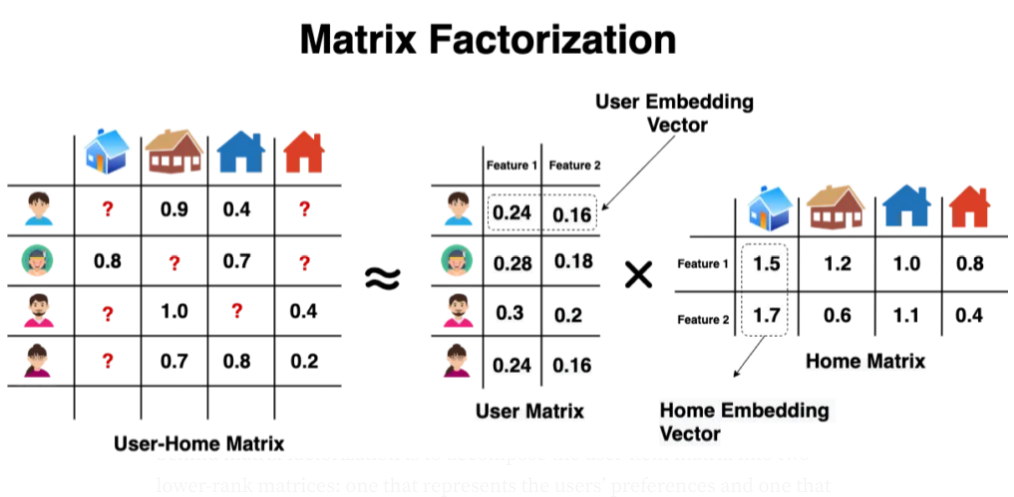